In [7]:
duom <- read.csv(header=TRUE, "insurance.csv")
head(duom)

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


In [15]:
model <- lm(charges ~ age + bmi + children, data=duom)
s <- summary(model)
s


Call:
lm(formula = charges ~ age + bmi + children, data = duom)

Residuals:
   Min     1Q Median     3Q    Max 
-13884  -6994  -5092   7125  48627 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6916.24    1757.48  -3.935 8.74e-05 ***
age           239.99      22.29  10.767  < 2e-16 ***
bmi           332.08      51.31   6.472 1.35e-10 ***
children      542.86     258.24   2.102   0.0357 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11370 on 1334 degrees of freedom
Multiple R-squared:  0.1201,	Adjusted R-squared:  0.1181 
F-statistic: 60.69 on 3 and 1334 DF,  p-value: < 2.2e-16


In [27]:
RSE <-s$sigma
R_sqr <- s$r.squared
MSE <- RSE^2
sprintf("RSE = %f", RSE)
sprintf("R^2 = %f", R_sqr)
sprintf("MSE = %f", MSE)

[1] "RSE = 11372.329623"

[1] "R^2 = 0.120098"

[1] "MSE = 129329881.051331"

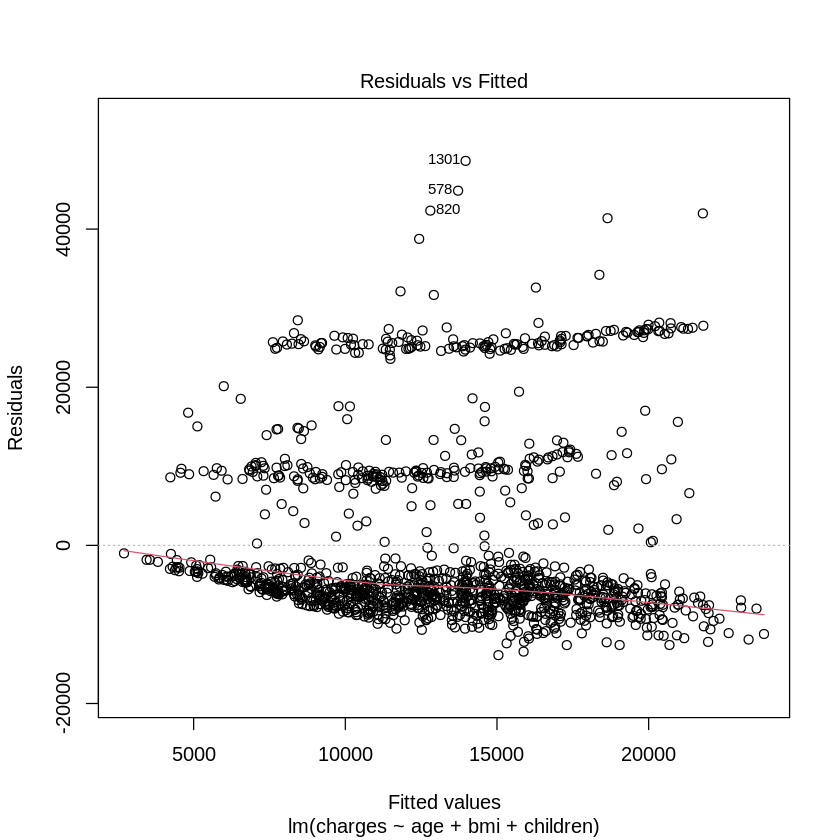

In [28]:
plot(model, which = 1)

In [29]:
library(lmtest)

ERROR: Error in library(lmtest): there is no package called ‘lmtest’


In [30]:
bptest(model)


ERROR: Error in bptest(model): could not find function "bptest"


Statistical Test: Breusch-Pagan Test
The Breusch-Pagan test is a formal statistical test for heteroscedasticity.

Null Hypothesis (H0): Homoscedasticity is present (error variances
are constant).

Alternative Hypothesis (Ha): Heteroscedasticity is present

A small p-value (e.g., < 0.05) leads to rejecting the null hypothesis,
indicating the presence of heteroscedasticity.

In [32]:
install.packages("lmtest")
library(lmtest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [33]:
bptest(model)


	studentized Breusch-Pagan test

data:  model
BP = 134.26, df = 3, p-value < 2.2e-16


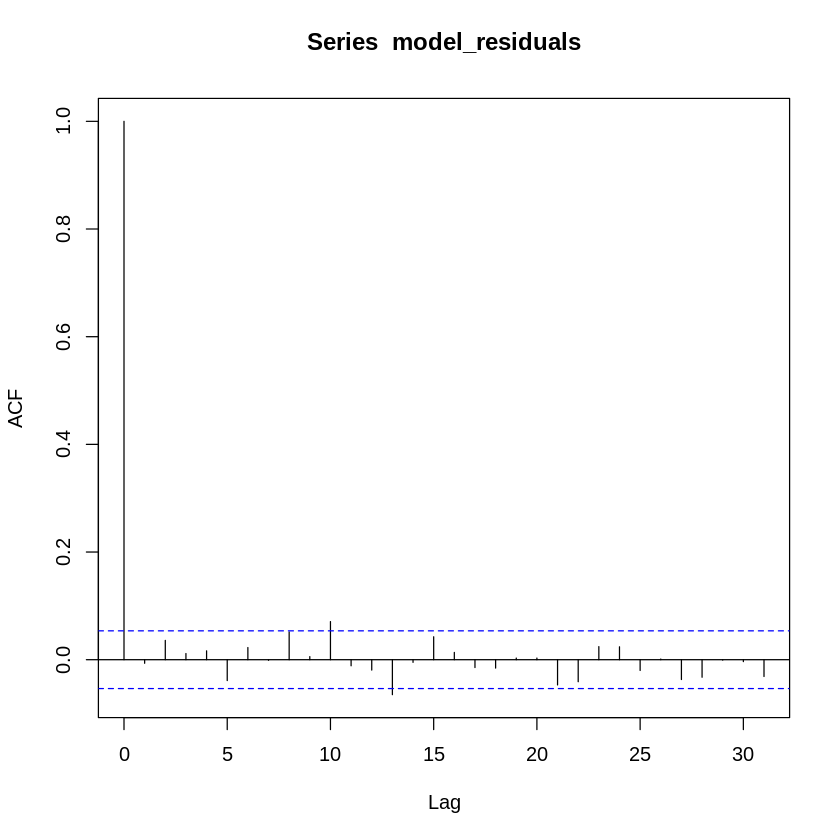

In [36]:
model_residuals <- residuals(model)
acf(model_residuals)

In the plot, a significant correlation is indicated by a spike that
extends beyond the dashed blue lines (the confidence interval).

If there is no autocorrelation, all spikes (except the one at lag 0)
should be within the blue lines.



The Durbin-Watson test is a formal statistical test for first-order
autocorrelation (i.e., correlation between an error and its immediately
preceding error).

Null Hypothesis (H0): There is no autocorrelation.

Alternative (Ha): There is autocorrelation.

The test statistic, d, ranges from 0 to 4.

*   d ≈ 2 indicates no autocorrelation.
*   d < 2 suggests positive autocorrelation.
*   d > 2 suggests negative autocorrelation.

In [37]:
dwtest(model)


	Durbin-Watson test

data:  model
DW = 2.0119, p-value = 0.5859
alternative hypothesis: true autocorrelation is greater than 0
